# Function M

In [8]:
def get_M_from_poprelab_and_dist(pop,dist):
    import numpy as np
    from itertools import combinations
    M = np.zeros(len(list(combinations(pop.index.values,2))))

    pop_shape = pop.shape
    dist_shape = dist.shape

    mask = np.zeros_like(dist)
    for i in range(dist_shape[-1]):
        for j in range(i, dist_shape[-1]):
            mask[i,j]=1

    t0s = np.zeros(len(pop))
    ts = np.zeros_like(M)

    for i in range(pop.shape[0]):
        wiwj = pop.iloc[i,:].to_numpy(copy=True)
        wiwj = wiwj.reshape(-1,1)
        wiwj = wiwj.T*wiwj*mask
        numerator = dist.fillna(0).to_numpy(copy=True)
        t0=np.sum(numerator*wiwj)/np.sum(wiwj)
        t0s[i] = t0

    count = 0
    for i in range(pop.shape[0]):
        for j in range(i+1,pop.shape[0]):
            wiwj = pop.iloc[[i,j],:].to_numpy(copy=True)
            wiwj = np.sum(wiwj,axis=0)
            wiwj = wiwj.reshape(-1,1)
            wiwj = wiwj.T*wiwj*mask
            numerator = dist.fillna(0).to_numpy(copy=True)
#             t=np.sum(numerator*wiwj)/np.sum(wiwj)
            t=np.sum(numerator*wiwj)

            M[count] = t0s[i]/(2*(t-t0s[i]))
            count+=1
    
    M_df=pd.DataFrame(M,index=list(combinations(pop.index.values,2)),columns=['M'])
    return(M_df)
        

    
############################################################
    
    
  

# Test data

distance matrix between haplotypes
          0         1         2         3
0       NaN  3.652463  3.145481  1.978088
1  3.652463       NaN  5.045307  3.669252
2  3.145481  5.045307       NaN  3.162271
3  1.978088  3.669252  3.162271       NaN
haplotype frequencies in pops
         0     1     2     3
pop1  0.25  0.25  0.25  0.25
pop2  0.50  0.00  0.00  0.50
pop3  0.00  0.50  0.50  0.00
physical dist between pops
      pop1  pop2  pop3
pop1     0    10   100
pop2    10     0  1000
pop3  1000   100     0


,log(M),log(physical_dist)
"(pop1, pop2)",-0.619289,2.302585
"(pop1, pop3)",-1.206790,4.605170
"(pop2, pop3)",-2.614562,6.907755


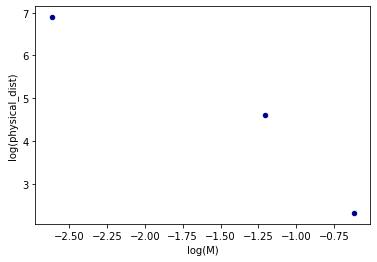

In [9]:
import pandas as pd
from itertools import combinations,permutations
from itertools import combinations_with_replacement as CRnr
from Bio import Phylo
import numpy as np
# from CRISPR_functions import phylogeny_from_CRISPR,find_optimum_rho_and_distances_ordered_model,get_distance_matrix_from_phylogeny

arrays=[[9,2,3,4,5],[0,1,2,3,7,8],[1,10,11,12,13],[13,14]]
dist=pd.DataFrame({0: {0: np.nan, 1: 3.6524628265804435, 2: 3.1454810266042403, 3: 1.9780877045993273}, 1: {0: 3.6524628265804435, 1: np.nan, 2: 5.045307371326096, 3: 3.669252411212307}, 2: {0: 3.1454810266042403, 1: 5.045307371326096, 2: np.nan, 3: 3.162270611236104}, 3: {0: 1.9780877045993273, 1: 3.669252411212307, 2: 3.162270611236104, 3: np.nan}})

print('distance matrix between haplotypes')
print(dist)

pop=pd.DataFrame([[0.25,0.25,0.25,0.25],
                  [0.5,0,0,0.5],
                  [0,0.5,0.5,0]],
                 columns=[0,1,2,3],index=['pop1','pop2','pop3'])


print('haplotype frequencies in pops')
print(pop)  

physical_dist=pd.DataFrame([[0,10,100],[10,0,1000],[1000,100,0]],index=['pop1','pop2','pop3'],columns=['pop1','pop2','pop3'])

print('physical dist between pops')
print(physical_dist)

M_vals=np.log(get_M_from_poprelab_and_dist(pop,dist))
M_vals.columns=['log(M)']
M_vals['log(physical_dist)']=np.log([physical_dist.loc[(i,j)] for i,j in list(combinations(physical_dist.index.values,2))])
# M_vals['Pair']=['-'.join(item) for item in M_vals.index.values]
M_vals.plot.scatter(x='log(M)',
                    y='log(physical_dist)',
                    c='DarkBLue')
M_vals

# Mydata

## Loading the data and grouping according to hierarchical clusters

In [162]:
import pandas as pd
import numpy as np

dist=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.dist',sep='\t')
dist/2

# pop_vals= pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.popcounts',sep='\t',header=0,index_col=0)
# pop_vals=pop_vals.T
# pop_vals.dtypes

pop_vals= pd.read_csv('/Users/maeperez/Desktop/CRISPR/CRISPR_blast/ALLCRISPRs_haplo_matches_at_5_dist_V6_sorted.txt',sep=',',header=0,index_col=0)
pop_vals=pop_vals.T.drop('seq.id',axis=0).iloc[:,:10]
pop_vals[pop_vals.isna()] = 0
pop_vals = pop_vals.astype(float)

print(pop_vals2.columns)

meta1=pd.read_csv('/Users/maeperez/Dropbox/DSBS18/metadata_env.txt',sep='\t',header=0)
meta1

meta2=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/CRISPR_metadata.txt',sep='\t',header=0)
meta2

meta3=pd.merge(meta1,meta2,how='inner',on='Site')
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return( d)
# print(meta3.lat)
meta3.lat = [sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.lat.values]
meta3.long = [-sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.long.values]
meta3.Sample = [string[4:] for string in meta3.Sample.values]

pop_vals=pop_vals/pop_vals.sum(axis=1).to_numpy().reshape(-1,1)

pop_vals['Sample']=pop_vals.index
pop_vals.columns


df=pd.merge(pop_vals,meta3,how='left',on='Sample')
df

# # # c= df.groupby(['Region']).agg(lambda x: x.sum()/x.count())

pop_vals_samples=df.groupby(['Sample']).agg('mean')
pop_vals_regions=df.groupby(['Region']).agg('mean')
pop_vals_site=df.groupby(['Site']).agg('mean')
pop_vals_ind=df.groupby(['Ind']).agg('mean')
pop_vals_habitat= df.groupby(['Region','Flow']).agg('mean')
pop_vals_habitat.index= ['-'.join(item) for item in df.groupby(['Region','Flow']).agg('mean').index.to_flat_index()]
pop_vals_samples

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Sample'], dtype='object')


## Testing the island model: Getting log(M) vs log(distance) for groups

/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


,M,physical_dist
"(R01L-10-T, R01L-12-T)",0.003354,0.000000
"(R01L-10-T, R02H-7-T)",0.005892,0.185325
"(R01L-10-T, R02H-8-T)",0.083586,0.185325
"(R01L-10-T, R02H-8-T_bis)",0.008313,0.185325
"(R01L-10-T, R02H-9-T)",0.001317,0.185325
...,...,...
"(R16L-2-T, R16L-4-T)",0.046352,0.000000
"(R16L-2-T, R16L-5-T)",0.088534,0.000000
"(R16L-3-T, R16L-4-T)",0.220116,0.000000
"(R16L-3-T, R16L-5-T)",0.313212,0.000000


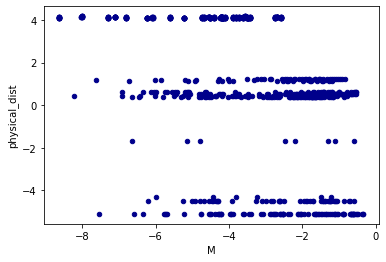

In [168]:
### By individual samples

table=pop_vals_samples

M_vals=get_M_from_poprelab_and_dist(table.iloc[:,:10],dist/2)    

M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]



np.log(M_vals).plot.scatter(x='M',
                      y='physical_dist',
                      c='DarkBlue')

M_vals
# print(M_vals.physical_dist.values)
# print([(combi,(table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values])
# np.log(M_vals)['physical_dist'].values
# M_vals.to_csv('pop_vals_samples_pairwise_fst.txt',sep='\t')

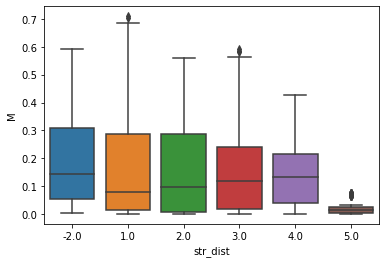

In [169]:
import seaborn as sns
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))
M_vals['str_dist']=list(map(str,M_vals['str_dist']))
M_vals
ax = sns.boxplot(x="str_dist", y="M", data=M_vals)

/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


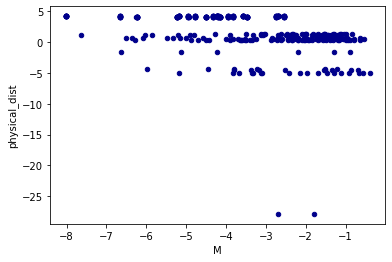

In [170]:
### By individual worms

table=pop_vals_ind

M_vals=get_M_from_poprelab_and_dist(table.iloc[:,:10],dist/2)    

M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]
M_vals['physical_dist']=M_vals['physical_dist']


np.log(M_vals).plot.scatter(x='M',
                      y='physical_dist',
                      c='DarkBlue')
# print(M_vals.physical_dist.values)
# print([(combi,(table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values])

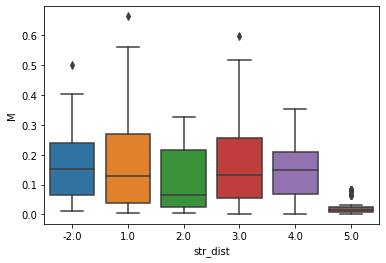

In [133]:
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))
M_vals['str_dist']=list(map(str,M_vals['str_dist']))
M_vals
ax=sns.boxplot(x="str_dist", y="M", data=M_vals)

,M,physical_dist
"(R01L, R02H)",0.115075,0.185325
"(R01L, R07B)",0.103464,1.856136
"(R01L, R08H)",0.276022,1.856721
"(R01L, R09L)",0.093853,1.852767
"(R01L, R13L)",0.089249,3.339842
"(R01L, R14B)",0.025350,3.345970
"(R01L, R15H)",0.014076,63.302494
"(R01L, R16L)",0.014089,64.842177
"(R02H, R07B)",0.197159,1.671234
"(R02H, R08H)",0.414390,1.671863


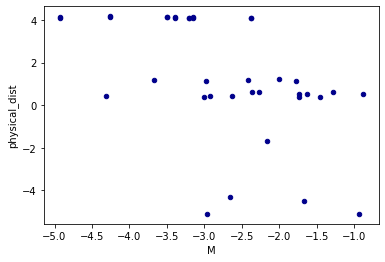

In [171]:
### By individual site

table=pop_vals_site

M_vals=get_M_from_poprelab_and_dist(table.iloc[:,:10],dist/2)    

M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]



np.log(M_vals).plot.scatter(x='M',
                      y='physical_dist',
                      c='DarkBlue')
# print(M_vals.physical_dist.values)
# print([(combi,(table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values])
M_vals

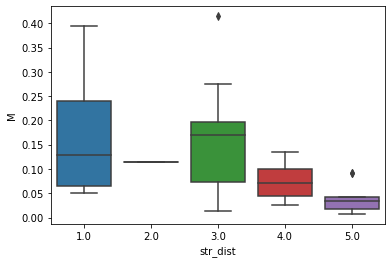

In [172]:
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))
M_vals['str_dist']=list(map(str,M_vals['str_dist']))
M_vals
ax=sns.boxplot(x="str_dist", y="M", data=M_vals)

,M,physical_dist
"(CB, MEF)",0.536565,1.883210
"(CB, MV)",0.101640,60.772222
"(MEF, MV)",0.029538,62.587414


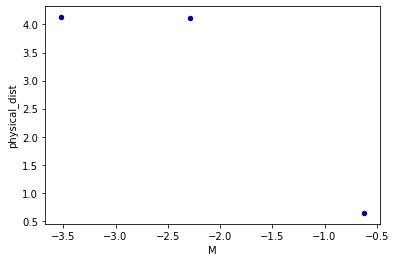

In [173]:
### By individual region
table=pop_vals_regions

M_vals=get_M_from_poprelab_and_dist(table.iloc[:,:10],dist/2)    

M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]



np.log(M_vals).plot.scatter(x='M',
                      y='physical_dist',
                      c='DarkBlue')
# print(M_vals.physical_dist.values)
# print([(combi,(table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values])
M_vals

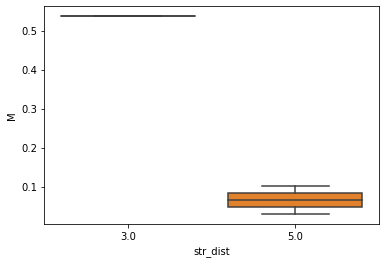

In [174]:
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))
M_vals['str_dist']=list(map(str,M_vals['str_dist']))
M_vals
ax=sns.boxplot(x="str_dist", y="M", data=M_vals)

,M,physical_dist
"(CB-B, MEF-B)",0.295949,1.507487
"(CB-B, MEF-L)",0.301760,1.914385
"(CB-B, MV-L)",0.092517,61.656939
"(MEF-B, MEF-L)",0.205786,0.415202
"(MEF-B, MV-L)",0.033780,63.133413
"(MEF-L, MV-L)",0.035999,63.511589


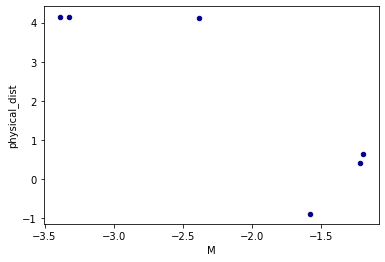

In [175]:
### By individual Regions, LF and Basalts only
table=pop_vals_habitat
table = table[~table.index.str.contains("-H")]

M_vals=get_M_from_poprelab_and_dist(table.iloc[:,:10],dist/2)    

M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]



np.log(M_vals).plot.scatter(x='M',
                      y='physical_dist',
                      c='DarkBlue')
# print(M_vals.physical_dist.values)
# print([(combi,(table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values])
M_vals

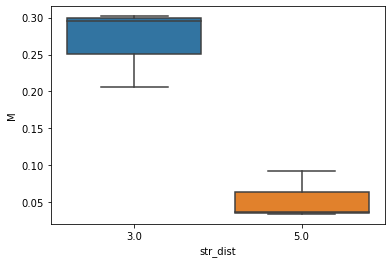

In [176]:
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))
M_vals['str_dist']=list(map(str,M_vals['str_dist']))
M_vals
ax=sns.boxplot(x="str_dist", y="M", data=M_vals)

# Rework Function for getting Fst and Nm

In [177]:
from itertools import product
# table=pop_vals_regions

# pop=table.iloc[:,:10].copy()

# dist=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.dist',sep='\t')
# dis=dist.copy()/2
# dis=dis.fillna(0)

dist=pd.DataFrame({0: {0: np.nan, 1: 4, 2: 3, 3: 2}, 1: {0: 4, 1: np.nan, 2: 5, 3: 1}, 2: {0: 3, 1: 5, 2: np.nan, 3: 3}, 3: {0: 2, 1: 1, 2: 3, 3: np.nan}})

dist=pd.DataFrame({0: {0: np.nan, 1: 10, 2: 2}, 1: {0: 10, 1: np.nan, 2: 1 }, 2: {0: 2, 1: 1, 2: np.nan}})

dist=dist.copy()
dist=dist.fillna(0)
print('distance matrix between haplotypes')
print(dist)

pop=pd.DataFrame([[1./3,1./3,1./3],
                  [1/2,0,1./2],
                  [0,1,0],
                 [0,1/2,1/2]],
                 columns=[0,1,2],index=['pop1','pop2','pop3','pop4'])

print('haplotypes frequencies in the population')
print(pop)

# print(pop.shape,pop.T.shape,dist.shape)
# t0_vect=pop.T.dot(dist)
# t0_vect

print(list(product(pop.columns.values,repeat=2)))
pop_wide = pd.DataFrame([],columns=list(product(pop.columns.values,repeat=2)),index=pop.index)
for col in pop_wide.columns:
#     print(pop.loc[:,col].product(axis=1))
    pop_wide.loc[:,col]=pop.loc[:,col].product(axis=1)
# print(pop_wide.sum(axis=1))
print('pop_wide')
print(pop_wide)
pairs_list=product(pop.columns.values,repeat=2)
# print(list(pairs_list))
dist_series=pd.Series([dis.iloc[combi] for combi in list(pairs_list)])
# dist_series2=pd.Series([dis.iloc[combi] for combi in list(pairs_list)],name='pop2')
# dist_series3=pd.Series([dis.iloc[combi] for combi in list(pairs_list)],name='pop3')

dist_wide = pd.DataFrame([],index=pop.index,columns=[str(idx) for idx in list(product(dist.columns.values,repeat=2))])
for index in list(product(dist.columns.values,repeat=2)):
    i=index[0]
    j=index[1]
    idx=str(index)
#     print(dist_wide.loc[:,idx])
    dist_wide.loc[:,idx]=[dist.loc[i,j],dist.loc[i,j],dist.loc[i,j],dist.loc[i,j]]

print('dist_wide')
print(dist_wide)
# print(pop_wide*dist_wide)
t0_v1=(pop_wide*dist_wide)
print('t0')
print(t0_v1)
t0_v1=t0_v1.sum(axis=1)
# print(pop_wide.shape,dist_wide.shape)
# t0_v1=pop_wide.dot(dist_series.to_numpy().reshape(-1,1))
print('t0')
print(t0_v1)

pop_pairs_wide= pd.DataFrame([],columns=list(product(pop.columns.values,repeat=2)),index=list(combinations(pop.index.values,2)))

for idx in list(pop_pairs_wide.index.values):
    pop_pairs_wide.loc[[idx],:]=np.array(pop_wide.loc[idx,:].sum()/2)
#     print(pop_wide.loc[idx,:])
#     print('sum')
#     print(pop_wide.loc[idx,:].sum(axis=0)/2)
#     print()      
print('pop_pairs_wide')
print(pop_pairs_wide)

dist_wide2=dist_wide.copy()
print(dist_wide2)
# dist_wide2.index=list(combinations(pop.index.values,2))
t_v1=(pop_pairs_wide*dist_wide2)
t_v1=t_v1.sum(axis=1)
# t_v1 = pop_pairs_wide.dot(dist_series.to_numpy().reshape(-1,1))
t_v1.index=[str(idx) for idx in t_v1.index]

print('tt')
print(t_v1)
M=pd.DataFrame([],columns=['M','Fst'],index=[str(idx) for idx in list(combinations(pop.index.values,2))])
print(M)
for idx in list(combinations(pop.index.values,2)):
    t0=t0_v1.loc[idx[1]]
    t1=t0_v1.loc[idx[0]]
    tt=t_v1.loc[str(idx)]
    print('tt',tt)
    print('t0',t0)
    print('t1',t1)
#     avg_t=(t0+t1)/2
#     print(tt,avg_t,tt-avg_t, (tt-avg_t)/tt)
    print('tt',tt,'t0',t0)
    Fst=1-(t0/tt)
    print('fst',Fst)
    M.loc[str(idx),'M']=float(t0/(2*(tt-t0)))
    M.loc[str(idx),'Fst']=1-(t0/tt)

M
        


distance matrix between haplotypes
      0     1    2
0   0.0  10.0  2.0
1  10.0   0.0  1.0
2   2.0   1.0  0.0
haplotypes frequencies in the population
             0         1         2
pop1  0.333333  0.333333  0.333333
pop2  0.500000  0.000000  0.500000
pop3  0.000000  1.000000  0.000000
pop4  0.000000  0.500000  0.500000
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
pop_wide
        (0, 0)    (0, 1)    (0, 2)    (1, 0)    (1, 1)    (1, 2)    (2, 0)  \
pop1  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111  0.111111   
pop2  0.250000  0.000000  0.250000  0.000000  0.000000  0.000000  0.250000   
pop3  0.000000  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
pop4  0.000000  0.000000  0.000000  0.000000  0.250000  0.250000  0.000000   

        (2, 1)    (2, 2)  
pop1  0.111111  0.111111  
pop2  0.000000  0.250000  
pop3  0.000000  0.000000  
pop4  0.250000  0.250000  


NameError: name 'dis' is not defined

In [178]:
Test=get_M_from_poprelab_and_dist(pop,dist)
Test['Fst']=0.5*1/Test['M']
Test
dist.to_numpy()
pop.to_numpy()

array([[0.33333333, 0.33333333, 0.33333333],
       [0.5       , 0.        , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ]])

Fst = 1 if populations are completely differentiated or the population 0 is completely homozygous

In [179]:
list(combinations(pop.index.values,2))
import numpy as np
from itertools import combinations
M = np.zeros(len(list(combinations(pop.index.values,2))))
Fst=np.zeros(len(list(combinations(pop.index.values,2))))

pop_shape = pop.shape
dist_shape = dist.shape

# mask = np.zeros_like(dist)
# for i in range(dist_shape[-1]):
#     for j in range(i, dist_shape[-1]):
#         mask[i,j]=1

t0s = np.zeros(len(pop))
ts = np.zeros_like(M)

for i in range(pop.shape[0]):
    wiwj = pop.iloc[i,:].to_numpy(copy=True)
    wiwj = wiwj.reshape(-1,1)
#     wiwj = wiwj.T*wiwj*mask
    wiwj = wiwj.T*wiwj

    numerator = dist.fillna(0).to_numpy(copy=True)
#     t0=np.sum(numerator*wiwj)/np.sum(wiwj)
    t0=np.sum(numerator*wiwj)*2

    t0s[i] = t0
print(t0s)
count = 0
for i in range(pop.shape[0]):
    for j in range(i+1,pop.shape[0]):
#         wiwj = pop.iloc[[i,j],:].to_numpy(copy=True)
#         print(wiwj)
#         wiwj = np.sum(wiwj,axis=0)
#         wiwj = wiwj.reshape(-1,1)
# #         wiwj = wiwj.T*wiwj*mask
#         wiwj = wiwj.T*wiwj

#         numerator = dist.fillna(0).to_numpy(copy=True)
# #         t=np.sum(numerator*wiwj)/np.sum(wiwj)
#         t=np.sum(numerator*wiwj)
        t=(t0s[i]+t0s[j])/2
        print('t0',t0s[i])
        print('t',t)
        fst=-1*(1-(t0s[i]/t))
        print('fst',fst)
#         print('t',t,'avg_t',(t0s[i]+t0s[j])/2)
        M[count] = (1/fst -1)/2
        Fst[count] = fst

#         M[count] = (t-((t0s[i]+t0s[j])/2))/t
#         M[count] = (t-t0s[i])/t
#         M[count] = -1*(1-(t0s[i]/t))


        count+=1

M_df=pd.DataFrame(M,index=list(combinations(pop.index.values,2)),columns=['M'])
M_df['Fst']=Fst
M_df[['Fst']]

[5.77777778 2.         0.         1.        ]
t0 5.777777777777779
t 3.8888888888888893
fst 0.48571428571428577
t0 5.777777777777779
t 2.8888888888888893
fst 1.0
t0 5.777777777777779
t 3.3888888888888893
fst 0.7049180327868854
t0 2.0
t 1.0
fst 1.0
t0 2.0
t 1.5
fst 0.33333333333333326
t0 0.0
t 0.5
fst -1.0


,Fst
"(pop1, pop2)",0.485714
"(pop1, pop3)",1.000000
"(pop1, pop4)",0.704918
"(pop2, pop3)",1.000000
"(pop2, pop4)",0.333333
"(pop3, pop4)",-1.000000


In [9]:

dist=pd.DataFrame({0: {0: np.nan, 1: 4, 2: 3, 3: 2}, 1: {0: 4, 1: np.nan, 2: 5, 3: 1}, 2: {0: 3, 1: 5, 2: np.nan, 3: 3}, 3: {0: 2, 1: 1, 2: 3, 3: np.nan}})

dist=pd.DataFrame({0: {0: np.nan, 1: 10, 2: 2}, 1: {0: 10, 1: np.nan, 2: 1 }, 2: {0: 2, 1: 1, 2: np.nan}})

dist=dist.copy()
dist=dist.fillna(0)
print('distance matrix between haplotypes')
print(dist)

pop=pd.DataFrame([[1./3,1./3,1./3],
                  [1/2,0,1./2],
                  [0,1,0]],
                 columns=[0,1,2],index=['pop1','pop2','pop3'])

print('haplotypes frequencies in the population')
print(pop.to_numpy())

get_Fst_and_Nm(pop,dist)

distance matrix between haplotypes
      0     1    2
0   0.0  10.0  2.0
1  10.0   0.0  1.0
2   2.0   1.0  0.0
haplotypes frequencies in the population
[[0.33333333 0.33333333 0.33333333]
 [0.5        0.         0.5       ]
 [0.         1.         0.        ]]


NameError: name 'get_Fst_and_Nm' is not defined

# MyData

In [196]:
# list(combinations(pop.index.values,2))
def get_Fst_and_Nm(pop,dist):
    import numpy as np
    from itertools import combinations
    M = np.zeros(len(list(combinations(pop.index.values,2))))
    Fst=np.zeros(len(list(combinations(pop.index.values,2))))

    pop_shape = pop.shape
    dist_shape = dist.shape

    t0s = np.zeros(len(pop))
    ts = np.zeros_like(M)

    for i in range(pop.shape[0]):
        wiwj = pop.iloc[i,:].to_numpy(copy=True)
        wiwj = wiwj.reshape(-1,1)
        wiwj = wiwj.T*wiwj

        numerator = dist.fillna(0).to_numpy(copy=True)
        t0=np.sum(numerator*wiwj)*2

        t0s[i] = t0
    count = 0
    for i in range(pop.shape[0]):
        for j in range(i+1,pop.shape[0]):
            t=(t0s[i]+t0s[j])/2
            fst=-1*(1-(t0s[i]/t))

            M[count] = (1/fst -1)/2
            Fst[count] = fst
            count+=1

    M_df=pd.DataFrame(M,index=list(combinations(pop.index.values,2)),columns=['M'])
    M_df['Fst']=Fst
    return(M_df)

In [252]:
def table_vs_distance(table=pop_vals_samples):
    table=table

    M_vals=get_Fst_and_Nm(table.iloc[:,:10],dist/2)    
    M_vals['physical_dist']=[distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])) for combi in M_vals.index.values]

#     M_vals.plot.scatter(y='Fst',
#                           x='physical_dist',
#                           c='DarkBlue',
#                        logx=True)
    
    
    return(M_vals)

In [253]:
import pandas as pd
import numpy as np

dist=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.dist',sep='\t')
dist/2

# pop_vals= pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/prep_for_Arlequin/arrays_with_at_least_5percent_in_reads.popcounts',sep='\t',header=0,index_col=0)
# pop_vals=pop_vals.T
# pop_vals.dtypes

pop_vals= pd.read_csv('/Users/maeperez/Desktop/CRISPR/CRISPR_blast/ALLCRISPRs_haplo_matches_at_5_dist_V6_sorted.txt',sep=',',header=0,index_col=0)
pop_vals=pop_vals.T.drop('seq.id',axis=0).iloc[:,:10]
pop_vals[pop_vals.isna()] = 0
pop_vals = pop_vals.astype(float)

print(pop_vals2.columns)

meta1=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/metadata_env.txt',sep='\t',header=0)
meta1

meta2=pd.read_csv('/Users/maeperez/Desktop/CRISPR_distance/Mydata/CRISPR_metadata.txt',sep='\t',header=0)
meta2

meta3=pd.merge(meta1,meta2,how='inner',on='Site')
import math
def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6368.5 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return(d)
# print(meta3.lat)
meta3.lat = [sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.lat.values]
meta3.long = [-sum([int(val.split(' ')[0][:-1]),float(val.split(' ')[1])/60]) for val in meta3.long.values]
meta3.Sample = [string[4:] for string in meta3.Sample.values]
print(meta3)
pop_vals=pop_vals/pop_vals.sum(axis=1).to_numpy().reshape(-1,1)

pop_vals['Sample']=pop_vals.index


df=pd.merge(pop_vals,meta3,how='left',on='Sample')

# # # c= df.groupby(['Region']).agg(lambda x: x.sum()/x.count())

pop_vals_samples=df.groupby(['Sample']).agg('mean')
pop_vals_regions=df.groupby(['Region']).agg('mean')
pop_vals_site=df.groupby(['Site']).agg('mean')
pop_vals_ind=df.groupby(['Ind']).agg('mean')
pop_vals_habitat= df.groupby(['Region','Flow']).agg('mean')
pop_vals_habitat.index= ['-'.join(item) for item in df.groupby(['Region','Flow']).agg('mean').index.to_flat_index()]
pop_vals_samples

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Sample'], dtype='object')
    Site        lat        long  Depth  Temp_plume  Temp_base   seqid  \
0   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC13   
1   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC14   
2   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC15   
3   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC16   
4   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC47   
5   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC19   
6   R07B  47.949992 -129.097070   2195         2.8        2.8  PBBC21   
7   R14B  47.963057 -129.091665   2180         2.5        3.9  PBBC01   
8   R14B  47.963057 -129.091665   2180         2.5        3.9  PBBC03   
9   R02H  47.949333 -129.098642   2195         NaN        NaN  PBBC38   
10  R02H  47.949333 -129.098642   2195         NaN        NaN  PBBC18   
11  R02H  47.949333 -129.098642   2195         NaN        Na

,0,1,2,3,4,5,6,7,8,9,lat,long,Depth,Temp_plume,Temp_base
Sample,,,,,,,,,,,,,,,
R01L-10-T,0.000000,0.000000,0.995146,0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.949438,-129.098642,2190,NaN,NaN
R01L-12-T,0.000000,0.000000,0.795455,0.000000,0.000000,0.000000,0.000000,0.045455,0.159091,0.000000,47.949438,-129.098642,2190,NaN,NaN
R02H-7-T,0.004202,0.000000,0.953782,0.000000,0.008403,0.000000,0.000000,0.004202,0.008403,0.021008,47.949333,-129.098642,2195,NaN,NaN
R02H-8-T,0.000000,0.000000,0.988095,0.000000,0.000000,0.000000,0.000000,0.011905,0.000000,0.000000,47.949333,-129.098642,2195,NaN,NaN
R02H-8-T_bis,0.000000,0.000000,0.847561,0.000000,0.128049,0.000000,0.000000,0.024390,0.000000,0.000000,47.949333,-129.098642,2195,NaN,NaN
R02H-9-T,0.000000,0.000000,0.439655,0.000000,0.008621,0.000000,0.000000,0.017241,0.525862,0.008621,47.949333,-129.098642,2195,NaN,NaN
R07B-1-Ta,0.000000,0.000000,0.612717,0.000000,0.000000,0.000000,0.000000,0.381503,0.000000,0.005780,47.949992,-129.097070,2195,2.8,2.8
R07B-1-Tb,0.000000,0.000000,0.661088,0.000000,0.000000,0.000000,0.000000,0.334728,0.000000,0.004184,47.949992,-129.097070,2195,2.8,2.8
R07B-1-Tc,0.000000,0.000000,0.990164,0.000000,0.000000,0.000000,0.000000,0.009836,0.000000,0.000000,47.949992,-129.097070,2195,2.8,2.8


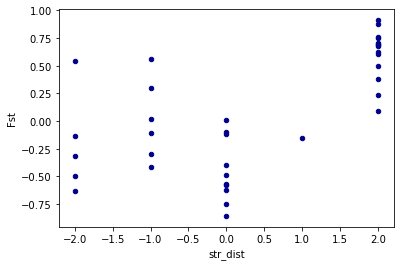

In [259]:
M_vals=table_vs_distance(table=pop_vals_site)
M_vals['str_dist']=round(np.log10(M_vals['physical_dist']*1000+0.01))-3
# M_vals['str_dist']=list(map(str,sorted(M_vals['str_dist'])))
M_vals
# M_vals.to_csv('PairwiseFt_per_site_V6.txt',sep='\t')

M_vals.plot.scatter(y='Fst',
                      x='str_dist',
                      c='DarkBlue')

# combi=('R15H','R16L')
# table=pop_vals_site.copy()
# print(table[table.index.isin(list(combi))].lat.values[0], table[table.index.isin(list(combi))].long.values[0])
# print(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1])
# distance((table[table.index.isin(list(combi))].lat.values[0],table[table.index.isin(list(combi))].long.values[0]),(table[table.index.isin(list(combi))].lat.values[1],table[table.index.isin(list(combi))].long.values[1]))

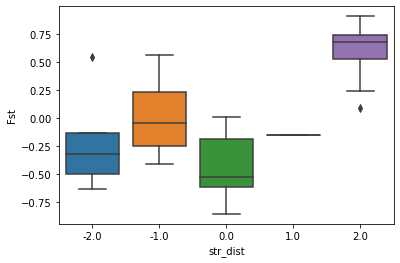

In [260]:
sns.boxplot(x="str_dist", y="Fst", data=M_vals)


In [243]:
# M_vals=table_vs_distance(table=pop_vals_samples)
print(pop_vals_site.loc[['R15H','R16L']].sum()/2)
pop_vals_site.loc[['R15H','R16L']]
pop_vals_site.to_csv('haplotype_freq_by_site.txt',sep='\t')

0                0.000317
1                0.000000
2                0.006423
3                0.000000
4                0.000420
5                0.000321
6                0.000000
7                0.001496
8                0.001051
9                0.989971
lat             48.442787
long          -128.695358
Depth         2421.500000
Temp_plume      11.800000
Temp_base       22.800000
dtype: float64


In [233]:
M_vals['s1']=[idx[0] for idx in M_vals.index.values]
M_vals['s2']=[idx[1] for idx in M_vals.index.values]

piv=M_vals.pivot(index='s1',columns='s2',values='Fst')
piv['R01L-10-T']=np.nan
piv=piv.append(pd.Series([],name='R16L-5-T'))
piv.sort_index(axis=0, inplace=True)
piv.sort_index(axis=1, inplace=True)
print(piv.columns.values)
print(piv.index.values)

for i in range(len(piv)):
    for j in range(i, len(piv)):
        piv.iloc[j][i] = piv.iloc[i][j]

piv.to_csv('/Users/maeperez/Desktop/CRISPR/Pairwise_Fst_matrix_v6.txt',sep='\t')
piv

['R01L-10-T' 'R02H' 'R07B' 'R08H' 'R09L' 'R13L' 'R14B' 'R15H' 'R16L']
['R01L' 'R02H' 'R07B' 'R08H' 'R09L' 'R13L' 'R14B' 'R15H' 'R16L-5-T']


/Users/maeperez/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


s2,R01L-10-T,R02H,R07B,R08H,R09L,R13L,R14B,R15H,R16L
s1,,,,,,,,,
R01L,NaN,-0.317054,-0.296777,0.298970,-0.411521,-0.399453,-0.748206,0.501592,0.378040
R02H,-0.317054,NaN,0.022384,0.562687,-0.108642,-0.094348,-0.565238,0.706319,0.620698
R07B,-0.296777,0.022384,NaN,0.547195,-0.130708,-0.116486,-0.580280,0.694922,0.606744
R08H,0.298970,0.562687,0.547195,NaN,-0.632654,-0.623913,-0.855752,0.238368,0.089146
R09L,-0.411521,-0.108642,-0.130708,-0.632654,NaN,0.014442,-0.486470,0.756881,0.683265
R13L,-0.399453,-0.094348,-0.116486,-0.623913,0.014442,NaN,-0.497417,0.750644,0.675488
R14B,-0.748206,-0.565238,-0.580280,-0.855752,-0.486470,-0.497417,NaN,0.908749,0.877924
R15H,0.501592,0.706319,0.694922,0.238368,0.756881,0.750644,0.908749,NaN,-0.152462
R16L-5-T,0.378040,0.620698,0.606744,0.089146,0.683265,0.675488,0.877924,-0.152462,NaN


In [242]:
df

,0,1,2,3,4,5,6,7,8,9,...,long,Depth,Temp_plume,Temp_base,seqid,Sample_id,Ind,Region,Flow,dupl
0,0.000000,0.000000,0.789720,0.000000,0.000000,0.186916,0.000000,0.009346,0.014019,0.000000,...,-129.096930,2197,2.9,7.5,PBBC32,C32,R09L-3,MEF,L,n
1,0.000000,0.000000,0.008475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.991525,...,-128.708587,2410,2.9,21.1,PBBC42,C48,R16L-4,MV,L,n
2,0.000000,0.000000,0.857143,0.000000,0.004329,0.000000,0.012987,0.021645,0.099567,0.004329,...,-129.096988,2197,13.7,37.9,PBBC22,C22,R08H-1,MEF,H,n
3,0.000000,0.000000,0.028470,0.000000,0.000000,0.000000,0.000000,0.971530,0.000000,0.000000,...,-129.097070,2195,2.8,2.8,PBBC19,C19,R07B-2,MEF,B,s
4,0.000000,0.000000,0.612717,0.000000,0.000000,0.000000,0.000000,0.381503,0.000000,0.005780,...,-129.097070,2195,2.8,2.8,PBBC13,C13,R07B-1,MEF,B,s
5,0.000000,0.000000,0.988095,0.000000,0.000000,0.000000,0.000000,0.011905,0.000000,0.000000,...,-129.098667,2195,NaN,NaN,PBBC39,C40,R02H-8,MEF,H,y
6,0.002717,0.000000,0.002717,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.994565,...,-128.682130,2433,20.7,24.5,PBBC09,C09,R15H-3,MV,H,y
7,0.000000,0.000000,0.004902,0.000000,0.000000,0.000000,0.000000,0.000000,0.001634,0.993464,...,-128.682130,2433,20.7,24.5,PBBC44,C51,R15H-7,MV,H,n
8,0.000000,0.000000,0.006818,0.000000,0.000000,0.002273,0.000000,0.002273,0.002273,0.986364,...,-128.708587,2410,2.9,21.1,PBBC12,C12,R16L-3,MV,L,n
9,0.000000,0.000000,0.541899,0.000000,0.011173,0.005587,0.011173,0.374302,0.005587,0.050279,...,-129.097070,2195,2.8,2.8,PBBC21,C21,R07B-3,MEF,B,n
